In [2]:
import pennylane as qml
import numpy as np

In [7]:
dev = qml.device("default.qubit", wires = 1)

@qml.qnode(dev)
def circuit(theta):
    qml.RX(theta, wires = 0)
    return qml.probs(wires = 0)

def probs_0(theta):
    return circuit(theta)[0]

opt = qml.GradientDescentOptimizer(stepsize = 0.2)

epochs = 150

sols = []
theta = np.random.rand()
for epoch in range(epochs):
    theta = opt.step(probs_0, theta)
    sols.append(theta)
    

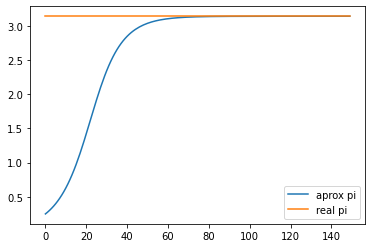

In [9]:
import matplotlib.pyplot as plt

plt.plot(sols, label = "aprox pi")
plt.plot([np.pi]*epochs, label = "real pi")
plt.legend()
plt.show()